Your objective is to build a series of scatter plots to showcase the following relationships:

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.
As final considerations:

You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.

In [1]:
# -----------------------------------------------------------------------------------
# Step 1: Import the modules 
# -----------------------------------------------------------------------------------
import seaborn as sns
import json
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import random as rd
from citipy import citipy
from localenv import apiKey

# also define my print function to make life cleaner
def displayProcessingCity(i,response):
    print(f"City #{i+1}")
    print(f"City URL: http://api.openweathermap.org/data/2.5/weather?id={response['id']}")
    print(f"City Name: {response['name']}")
    print(f"City ID: {response['id']}")
    print("----------------------------------------------------------------------------")  

In [2]:
# -----------------------------------------------------------------------------------
# Step 2: Store all our basic API data. I'd use params, but I couldn't get it to work
# with the unique structure of some of these parameters
# -----------------------------------------------------------------------------------

tempUnits = 'Imperial'
openWeatherURL = "http://api.openweathermap.org/data/2.5/weather?"

Your objective is to build a series of scatter plots to showcase the following relationships:

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude


In [8]:
# -----------------------------------------------------------------------------------
# Step 3: Pull data based on city IDs 
# -----------------------------------------------------------------------------------
# create a list that we'll store all our data in
weatherData_list = []

# create dupe checking set
cityDupeChecker = set()

# create counter
i = 0

# loop through all the cities, pull data and add to dictionaries, and print requested log information
while len(cityDupeChecker) <= 500:
    
    # set random lat and long
    latitude = rd.uniform(-90.0,90.0)
    longitude = rd.uniform(-180.0,180.0)

    # try to pull in a random value
    city = [citipy.nearest_city(latitude,longitude).city_name, citipy.nearest_city(latitude,longitude).country_code]
    
    # set value for current city and country code so we don't have to keep calling for it
    currentCityName = city[0]
    currentCountryCode = city[1]

    # get response
    try:
        response = req.get(f"{openWeatherURL}q={currentCityName},{currentCountryCode}&units={tempUnits}&APPID={apiKey}").json()
        
        try:
            if response['id'] not in cityDupeChecker:
                #show city
                displayProcessingCity(i,response)
            
                #increment counter
                i+=1
            
                # add to dupe checker
                cityDupeChecker.add(response['id'])

                # add information from response to list
                weatherData_list.append({'ID':response['id'],'Name': response['name'],\
                                         'Latitude':response['coord']['lat'],\
                                         'Humidity (%)':response['main']['humidity'],\
                                         'Temperature (Fahrenheit)':response['main']['temp'],\
                                         'Wind Speed':response['wind']['speed'],\
                                         'Cloudiness':response['clouds']['all'] })
        except:
            raise
    except Exception:
        raise
    else:    
        response = req.get(f"{openWeatherURL}q={currentCityName}&units={tempUnits}&APPID={apiKey}").json()
        
        try:
            if response['id'] not in cityDupeChecker:
                 #show city
                displayProcessingCity(i,response)
            
                #increment counter
                i+=1
            
                # add to dupe checker
                cityDupeChecker.add(response['id'])

                # add information from response to list
                weatherData_list.append({'ID':response['id'],'Name': response['name'],\
                                         'Latitude':response['coord']['lat'],\
                                         'Humidity (%)':response['main']['humidity'],\
                                         'Temperature (Fahrenheit)':response['main']['temp'],\
                                         'Wind Speed':response['wind']['speed'],\
                                         'Cloudiness':response['clouds']['all'] })
        
        except:
            raise

City #1
City URL: http://api.openweathermap.org/data/2.5/weather?id=2017155
City Name: Saskylakh
City ID: 2017155
----------------------------------------------------------------------------
City #2
City URL: http://api.openweathermap.org/data/2.5/weather?id=4893171
City Name: Freeport
City ID: 4893171
----------------------------------------------------------------------------
City #3
City URL: http://api.openweathermap.org/data/2.5/weather?id=3572375
City Name: Freeport
City ID: 3572375
----------------------------------------------------------------------------
City #4
City URL: http://api.openweathermap.org/data/2.5/weather?id=3374333
City Name: Praia
City ID: 3374333
----------------------------------------------------------------------------
City #5
City URL: http://api.openweathermap.org/data/2.5/weather?id=3460954
City Name: Praia
City ID: 3460954
----------------------------------------------------------------------------
City #6
City URL: http://api.openweathermap.org/data/2.

KeyError: 'id'

In [9]:
# -----------------------------------------------------------------------------------
# Step 4: Create a pretty dataframe that we can reference because visual aids are
# the actual best thing ever
# -----------------------------------------------------------------------------------

# create dataframe
cleanedWeather_df = pd.DataFrame(weatherData_list).set_index('ID')

# rearrange columns sensibly
cleanedWeather_df = cleanedWeather_df[['Name', 'Latitude', 'Temperature (Fahrenheit)',\
                                       'Humidity (%)', 'Wind Speed','Cloudiness']]
cleanedWeather_df.head()

,Name,Latitude,Temperature (Fahrenheit),Humidity (%),Wind Speed,Cloudiness
ID,,,,,,
2017155,Saskylakh,71.97,-19.32,83,12.86,44
4893171,Freeport,42.30,35.64,96,11.41,90
3572375,Freeport,26.54,72.66,100,6.93,0
3374333,Praia,14.92,71.60,64,8.05,40
3460954,Praia,-20.25,69.17,94,4.70,40


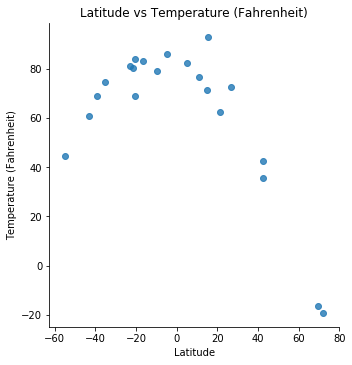

In [10]:
# -----------------------------------------------------------------------------------
# Step 5: Generate charts.
#  1) Temperature (F) vs. Latitude
#  2) Humidity (%) vs. Latitude
#  3) Cloudiness (%) vs. Latitude
#  4) Wind Speed (mph) vs. Latitude
# -----------------------------------------------------------------------------------

# Chart 1: Temperature vs Latitude
latVsTemp_plot = sns.lmplot(x='Latitude', y='Temperature (Fahrenheit)', data=cleanedWeather_df,\
                           fit_reg=False)
plt.title("Latitude vs Temperature (Fahrenheit)")
plt.show()